In [ ]:
# Project and dataset from udacity data course
# https://www.udacity.com/

# predict diamonds price 
# recommend bid price of diamonds, which would be 70% of price 

In [2]:
#-----------------------------import library------------------------------
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import os
import sys

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.style.use("ggplot")

In [3]:
#-----------------------------read dataset------------------------------
df = pd.read_csv("Train.csv")

In [4]:
#-----------------------------preparation------------------------------
# color D is valuable, J is yellow(relatively low value)
# label encoding : make orinal data to numerical
df1 = df.copy()
df1["color_ord"]=df1["color"].map(lambda x: 6 if x=="D" else 5 if x=="E" else 4 if x=="F"
                             else 3 if x=="G" else 2 if x=="H" else 1 if x=="I" else 0)
#only numerical variable
dfN = df1[["carat","cut_ord","clarity_ord","color_ord","price"]]

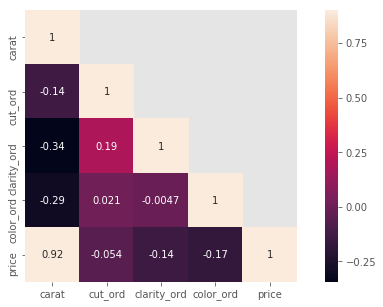

In [5]:
#-----------------------------EDA------------------------------
#1 correlation
corr=dfN.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False

fig,ax=plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(corr, mask=mask, vmax=.9, square=True, annot=True)

# there is no collineraity
#  carat has high correlration with price

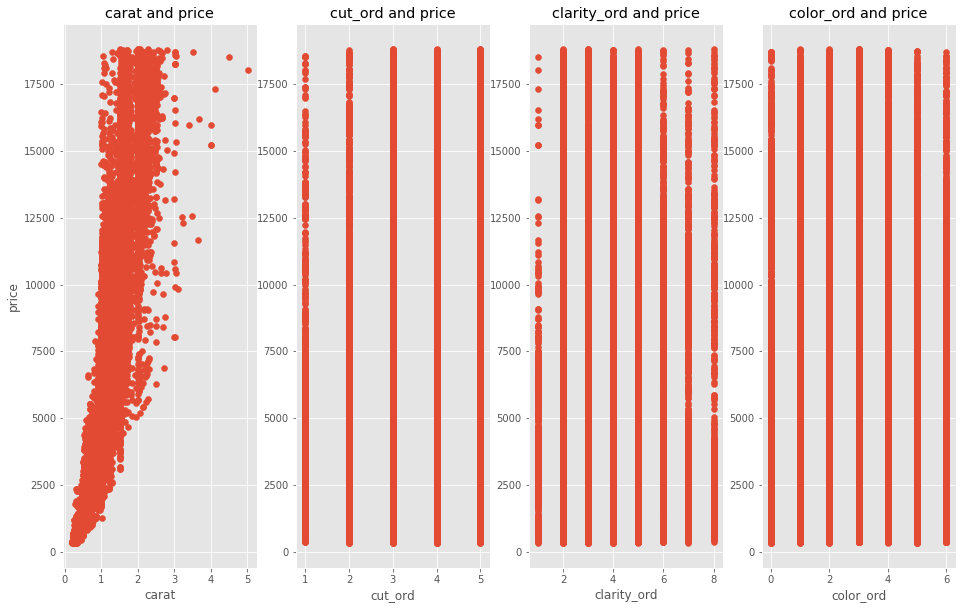

In [6]:
# scatter plot
fig = plt.figure(figsize=(16,10))
ax1= fig.add_subplot(1,4,1)
ax1.scatter(dfN.carat,dfN.price)
ax1.set_title("carat and price")
ax1.set_xlabel("carat")
ax1.set_ylabel("price")

ax2= fig.add_subplot(1,4,2)
ax2.scatter(dfN.cut_ord,dfN.price)
ax2.set_title("cut_ord and price")
ax2.set_xlabel("cut_ord")


ax3= fig.add_subplot(1,4,3)
ax3.scatter(dfN.clarity_ord,dfN.price)
ax3.set_title("clarity_ord and price")
ax3.set_xlabel("clarity_ord")


ax4= fig.add_subplot(1,4,4)
ax4.scatter(dfN.color_ord,dfN.price)
ax4.set_title("color_ord and price")
ax4.set_xlabel("color_ord")


plt.show()

# maybe better to to linear regression only with carat
# but this time, with all predictive variance

In [7]:
# make model of linear regression with OLS 

#OLS for all (carat, cut_ord, clarity_ord)
names="+".join(dfN.columns[:-1])
model=smf.ols(formula="price~"+names,data=dfN)
result=model.fit()

display(result.summary())

# Omnibus,Skewness and kurtosis is way higher than 0 (residual is not normally distributed)
# Durbin-Watson is near to 2: risk of autocorrelation is low
# So it would be better to do Logistic Regression than Linear, but Y value is continuous so it has to be linear 

# but this time only focused on R-Squared
# linear regression model 
# f(x) = -0.6734 + 8727*carat + 161*cut_ord + 494*clartiy_ord + 303*color_ord

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 1.141e+05
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:05:05   Log-Likelihood:            -4.2771e+05
No. Observations:               50000   AIC:                         8.554e+05
Df Residuals:                   49995   BIC:                         8.555e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6735.1295     32.923   -204.571      0.000   -6799.659   -6670.600
carat        8727.0845     13.301    656.130      0.000    8701.015    8753.154
cut_ord       161.3813      5.134     31.433      0.000     151.318     171.444
clarity_ord   494.7515      3.657    135.276      0.000     487.583     501.920
color_ord     303.6920      3.474     87.427      0.000     296.884     310.500
==============================================================================
Omnibus:                    10327.905   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           215535.191
Skew:                           0.456   Prob(JB):                         0.00
Kurtosis:                      13.130   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#-------------------apply model-----------------------

In [8]:
#-------------------read_data without price(label) -----------------------
dfP = pd.read_csv("test.csv")

In [9]:
dfP1 = dfP.copy()
# label encoding
dfP1["color_ord"]=dfP1["color"].map(lambda x: 6 if x=="D" else 5 if x=="E" else 4 if x=="F"
                             else 3 if x=="G" else 2 if x=="H" else 1 if x=="I" else 0)
#only numerical data
dfPN = dfP1[["carat","cut_ord","clarity_ord","color_ord"]]

In [10]:
predicted_price = [None]*dfPN.shape[0]
for i in range(dfPN.shape[0]):
    predicted_price[i]= -0.6734 + (8727*dfPN["carat"][i])+(161*dfPN["cut_ord"][i])+(494*dfPN["clarity_ord"][i])+(303*dfPN["color_ord"][i]) 

In [12]:
dfPN["Prdicted_Price"] = predicted_price
dfPN["recommend_bid"] = dfPN["Prdicted_Price"]/100*70

In [14]:
# result
dfPN.head(5)

,carat,cut_ord,clarity_ord,color_ord,Prdicted_Price,recommend_bid
0,1.22,4,3,3,13681.2666,9576.88662
1,1.01,2,5,3,12514.5966,8760.21762
2,0.71,3,5,1,9451.4966,6616.04762
3,1.01,5,2,6,12424.5966,8697.21762
4,0.27,5,6,2,6730.6166,4711.43162


In [ ]:
# option : Sklearn.linear_model LinearRegression

In [15]:
X = dfN.drop(columns="price")
y = dfN.price
#StandardScaler
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_scaled= sc.fit_transform(X)
#train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3)

In [16]:
#-------------Linear Regression --------------------------
from sklearn.linear_model import LinearRegression
linearmodle = LinearRegression().fit(X,y)

In [17]:
r_sq = linearmodle.score(X,y)
print(r_sq,linearmodle.intercept_,linearmodle.coef_)

# which is similar to results of OLS estimator 

0.9012913879766086 -6735.129549148643 [8727.08445394  161.38130288  494.75150504  303.69203747]
